In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

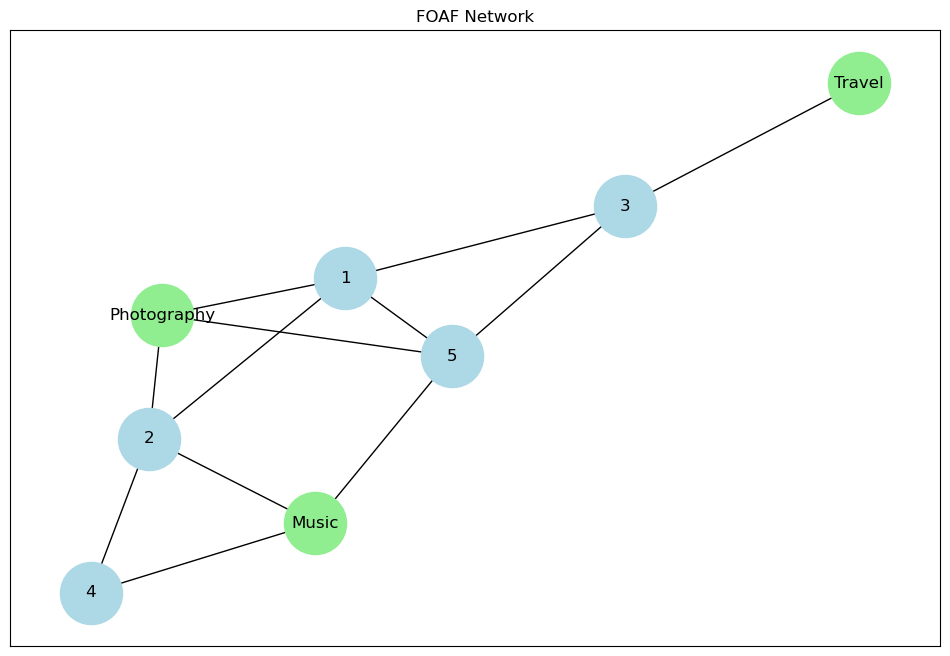

Recommendations for User 1: [2, 3, 'Photography', 5]
Recommendations for User 2: ['Music', 'Photography', 4, 1]
Recommendations for User 3: [1, 5]
Recommendations for User 4: ['Music', 2]
Recommendations for User 5: [3, 'Photography', 1]


In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Function to add users and friendships to the graph
def add_user(user_id, username):
    G.add_node(user_id, username=username, type="user")

def add_friendship(user1_id, user2_id):
    G.add_edge(user1_id, user2_id)

# Add interests as nodes to the graph
interests = ["Photography", "Music", "Travel"]
for interest in interests:
    G.add_node(interest, type="interest")

# Connect users to their interests (based on your example data)
G.add_edge(1, "Photography")
G.add_edge(2, "Photography")
G.add_edge(2, "Music")
G.add_edge(3, "Travel")
G.add_edge(4, "Music")
G.add_edge(5, "Music")
G.add_edge(5, "Photography")

# Example users and friendships
users = [
    (1, "Alice"),
    (2, "Bob"),
    (3, "Charlie"),
    (4, "David"),
    (5, "Eve")
]

friendships = [
    (1, 2),
    (1, 3),
    (2, 4),
    (3, 5),
    (1, 5)
]

# Add users and friendships to the graph
for user_id, username in users:
    add_user(user_id, username)

for user1_id, user2_id in friendships:
    add_friendship(user1_id, user2_id)

# Simple recommendation algorithm
def simple_recommendation(user_id):
    recommendations = []
    user_friends = set(G.neighbors(user_id))
    user_interests = set(G.neighbors(user_id))
    for friend in user_friends:
        friend_friends = set(G.neighbors(friend))
        shared_friends = user_friends.intersection(friend_friends)
        if len(shared_friends) > 0 and friend != user_id:  # Skip recommending the user itself
            recommendations.append(friend)
    return recommendations

# Draw the graph
pos = nx.spring_layout(G)
user_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'user']
interest_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'interest']
plt.figure(figsize=(12, 8))  # Set the figure size
nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='lightblue', node_size=2000)
nx.draw_networkx_nodes(G, pos, nodelist=interest_nodes, node_color='lightgreen', node_size=2000)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title("FOAF Network")
plt.show()

# Example usage of the recommendation algorithm
for user_id, _ in users:
    recommendations = simple_recommendation(user_id)
    print(f"Recommendations for User {user_id}: {recommendations}")


In [30]:
def calculate_weight(user_id, potential_recommendation_id, G):
    common_friends = len(set(G.neighbors(user_id)).intersection(set(G.neighbors(potential_recommendation_id))))
    shared_interests = len(set(G.neighbors(user_id)).intersection(set(G.neighbors(potential_recommendation_id))))
    return common_friends + shared_interests

def simple_recommendation_with_weights(G):
    recommendations = {}
    for user_id in G.nodes():
        recommendations[user_id] = []
        user_friends = set(G.neighbors(user_id))
        user_interests = set(G.neighbors(user_id))
        for potential_recommendation_id in G.nodes():
            if (
                G.nodes[potential_recommendation_id].get('type') == 'user' and  # Check if the node is a user
                potential_recommendation_id != user_id and 
                potential_recommendation_id not in user_friends
            ):
                potential_recommendation_interests = set(G.neighbors(potential_recommendation_id))
                shared_interests = len(user_interests.intersection(potential_recommendation_interests))
                if shared_interests > 0:  # Only recommend if there are shared interests
                    weight = calculate_weight(user_id, potential_recommendation_id, G)
                    recommendations[user_id].append((potential_recommendation_id, weight))
        recommendations[user_id].sort(key=lambda x: x[1], reverse=True)  # Sort recommendations by weight
    return recommendations

# Example usage
recommendations = simple_recommendation_with_weights(G)
print("Recommendations:")
for user_id, user_recommendations in recommendations.items():
    print(f"User {user_id}:")
    for recommendation, weight in user_recommendations:
        print(f"   - User {recommendation}: Weight = {weight}")


Recommendations:
User Photography:
   - User 3: Weight = 4
   - User 4: Weight = 2
User Music:
   - User 1: Weight = 4
   - User 3: Weight = 2
User Travel:
   - User 1: Weight = 2
   - User 5: Weight = 2
User 1:
   - User 4: Weight = 2
User 2:
   - User 5: Weight = 6
   - User 3: Weight = 2
User 3:
   - User 2: Weight = 2
User 4:
   - User 1: Weight = 2
   - User 5: Weight = 2
User 5:
   - User 2: Weight = 6
   - User 4: Weight = 2


In [8]:
testId = [1,2,3,4]
testDict = {1:[2],
            2:[1,3],
            3:[4],
            4:[2]
}

for i in testDict.keys():
    print(str(i) + " connait " + str(testDict[i]))

1 connait [2]
2 connait [1, 3]
3 connait [4]
4 connait [2]
